# 02/11/21 - This notebook uses fitsio to try to work with the weight coadds from kids in order to generate a noise map.

In [1]:
### libraries
%matplotlib inline
import matplotlib.pyplot as plt
#from autoconf import conf
#import autolens as al
#import autolens.plot as aplt
#import autofit as af
#import pandas as pd
import numpy as np
from astropy.io import fits
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import fitsio
from fitsio import FITS,FITSHDR

#from pyprojroot import here

workspace_path = '~/Desktop/'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")
# paths
autoz_path = f'{workspace_path}autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'
object_folder = f'{fits_path}G3575500_1906/'

/home/shawn/Desktop
Working Directory has been set to `~/Desktop/`


In [2]:
# open with fitsio.FITS
hdul = fitsio.FITS(f'/home/shawn/Downloads/Cal-JDEJONG-OMEGACAM-------OCAM_r_SDSS---Coadd---Wei-57878.9661791-55afda6652732cdda03ef77e75125ef075547d50.fits') # shit. I downloaded the coadd instead of the weight
#print(hdul)
#print(hdul[0].get_info()) # get info on primary hdu
#print(hdul[0]) # print basic info about primary hdu
header = hdul[0].read_header() # set header of primary hdu
image = hdul[0].read() # pull data
print(header)
wcs = WCS(header) # let wcs pull info from header
print(wcs) # should show crval and crpix same from header
#plt.imshow(image)


SIMPLE  =                    T / This is a FITS file
BITPIX  =                  -32 / 
NAXIS   =                    2 / 
NAXIS1  =                18687 / Number of pixels along this axis
NAXIS2  =                20024 / Number of pixels along this axis
EXTEND  =                    T / This file may contain FITS extensions
EQUINOX =               2000.0 / Mean equinox
RADECSYS= 'ICRS'               / Astrometric system
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis
CUNIT1  = 'deg'                / Axis unit
CRVAL1  =                129.0 / World coordinate on this axis
CRPIX1  =               9374.0 / Reference pixel on this axis
CD1_1   =     -5.555555638e-05 / Linear projection matrix
CD1_2   =                  0.0 / Linear projection matrix
CTYPE2  = 'DEC--TAN'           / WCS projection type for this axis
CUNIT2  = 'deg'                / Axis unit
CRVAL2  =         -1.489010989 / World coordinate on this axis
CRPIX2  =               9925.0 / Reference pixel on t

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [ ]:
coord=SkyCoord(ra=129.23265, dec=-1.57512, unit='deg', frame='icrs') # international celestial reference frame
position = wcs.world_to_pixel(coord)
print(coord)
#print(wcs.wcs.crval)
print(position)
size = u.Quantity(100, u.pixel)

cutout = Cutout2D(data=image, position=position, size=size, wcs=wcs, mode='trim')
image = cutout.data
#plt.imshow(image, origin='lower', cmap='gray')   
#plt.scatter(cutout.position_cutout[0], cutout.position_cutout[1], color='green')
print(image.shape)

2.3459596e-12
12.668182388488907


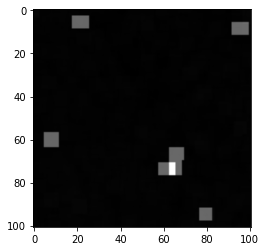

In [16]:
# now I want to see how it looks in counts.
gain = header['GAIN']
exp_time = 1800
rms_noise = 1/np.sqrt(image)
#noise_counts = rms_noise*gain*exp_time
noise_counts = rms_noise*3*10**9*exp_time# make up the gain value (3*10**9)
print(np.mean(rms_noise))
print(np.mean(noise_counts))

# plot image data
plt.figure()
#plt.title = (f'{hdul[0].header[6]}')
plt.imshow(noise_counts, cmap='gray') # show image in grayscale
plt.show()

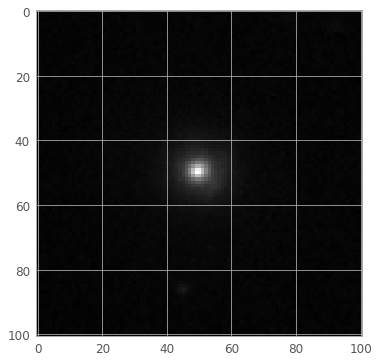

(101, 101)


In [37]:
# let's look at the links image
r = '1906_r.fits'
# get the files ready
# r
hdul = fits.open(f'/home/shawn/Desktop/autoz_lens_model/files/fits/G3575500_1906/1906_r.fits') # open the fits
#print(repr(hdul[0].header))
#print(hdul.info())
r_image = hdul[0].data # select first HDU to be the image
hdul.close()
# plot image data
plt.figure()
plt.imshow(r_image, cmap='gray') # show image in grayscale
plt.show()

print(r_image.shape)

252501.95


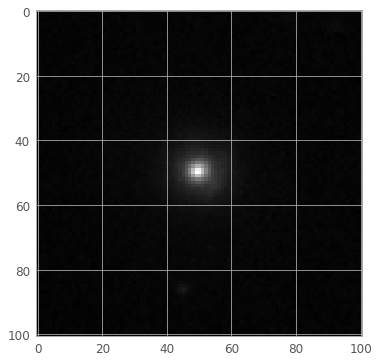